In [3]:
from statsmodels.tools.sm_exceptions import ValueWarning

import VARmodel
import loadDataForSKtime
import ARIMAmodel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueWarning)

In [4]:
loader = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ["HR", "O2Sat", "Resp", "MAP"])
sktime_df = loader.load_data()
train_data, test_data = loader.split_train_test(sktime_df)

train_data.head()

train_data_sub, test_data_sub = loader.subset_data(train_data, test_data, max_patient_id=500)
## pickle the data

MultiIndex([(  0,  1),
            (  0,  2),
            (  0,  3),
            (  0,  4),
            (  0,  5),
            (  0,  6),
            (  0,  7),
            (  0,  8),
            (  0,  9),
            (  0, 10),
            ...
            (499, 31),
            (499, 32),
            (499, 33),
            (499, 34),
            (499, 35),
            (499, 36),
            (499, 37),
            (499, 38),
            (499, 39),
            (499, 40)],
           names=['Patient_ID', 'ICULOS'], length=16424)
MultiIndex([(  0, 49),
            (  0, 50),
            (  0, 51),
            (  0, 52),
            (  0, 53),
            (  0, 54),
            (  1, 18),
            (  1, 19),
            (  1, 20),
            (  1, 21),
            ...
            (498, 32),
            (498, 33),
            (498, 34),
            (498, 35),
            (499, 41),
            (499, 42),
            (499, 43),
            (499, 44),
            (499, 45),
            (

In [3]:
train_data_sub.head()

HR  O2Sat  Resp    MAP
Patient_ID ICULOS                           
0          1        97.0   95.0  19.0  75.33
           2        97.0   95.0  19.0  75.33
           3        89.0   99.0  22.0  86.00
           4        90.0   95.0  30.0  86.00
           5       103.0   88.5  24.5  91.33

Poster - visualise pipeline

In [7]:
print(train_data_sub.isna().sum())
print(test_data_sub.isna().sum())

HR       0
O2Sat    0
Temp     0
Resp     0
MAP      0
dtype: int64
HR       0
O2Sat    0
Temp     0
Resp     0
MAP      0
dtype: int64


In [8]:
print(train_data_sub.head())

                      HR  O2Sat  Temp    SBP    MAP  DBP  Resp  EtCO2  \
Patient_ID ICULOS                                                       
0          1        -1.0   -1.0  -1.0   -1.0  -1.00 -1.0  -1.0   -1.0   
           2        97.0   95.0  -1.0   98.0  75.33 -1.0  19.0   -1.0   
           3        89.0   99.0  -1.0  122.0  86.00 -1.0  22.0   -1.0   
           4        90.0   95.0  -1.0   -1.0  -1.00 -1.0  30.0   -1.0   
           5       103.0   88.5  -1.0  122.0  91.33 -1.0  24.5   -1.0   

                   BaseExcess  HCO3  ...  PTT  WBC  Fibrinogen  Platelets  \
Patient_ID ICULOS                    ...                                    
0          1             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           2             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           3             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           4             24.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           5             -

In [7]:
print(type(train_data_sub))

<class 'pandas.core.frame.DataFrame'>


C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_py

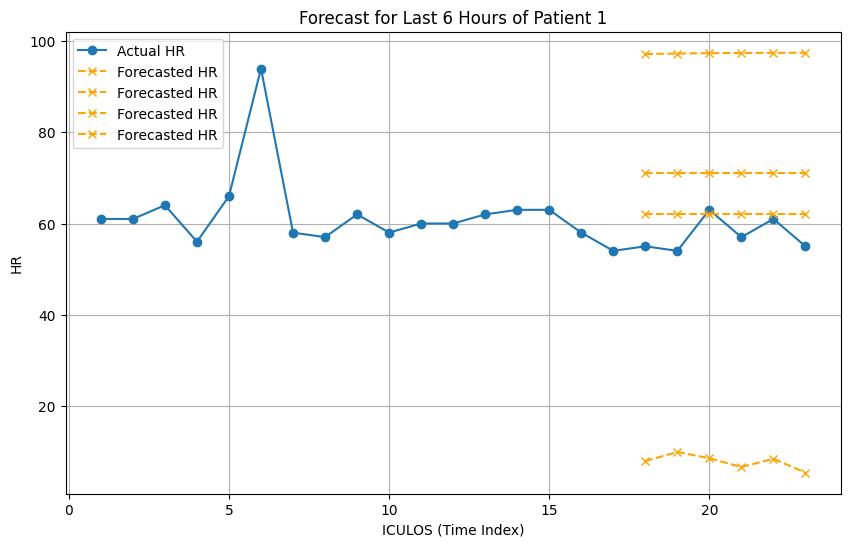

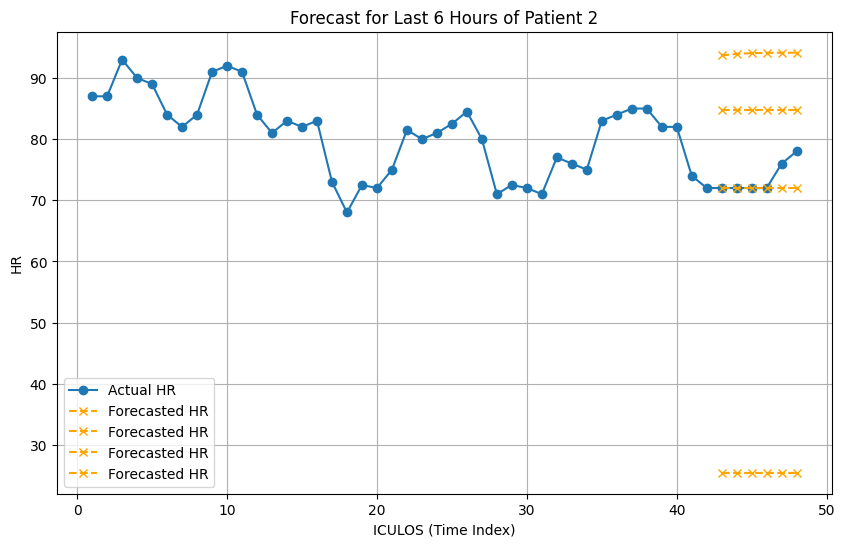

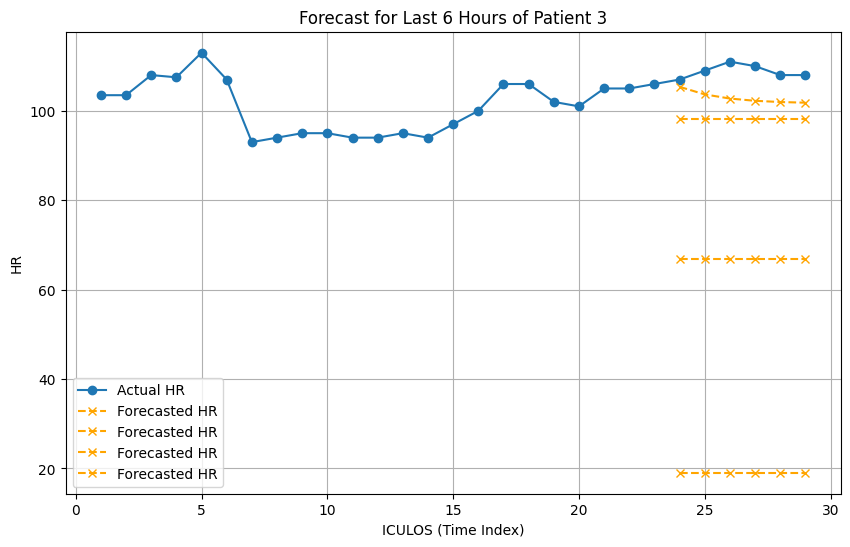

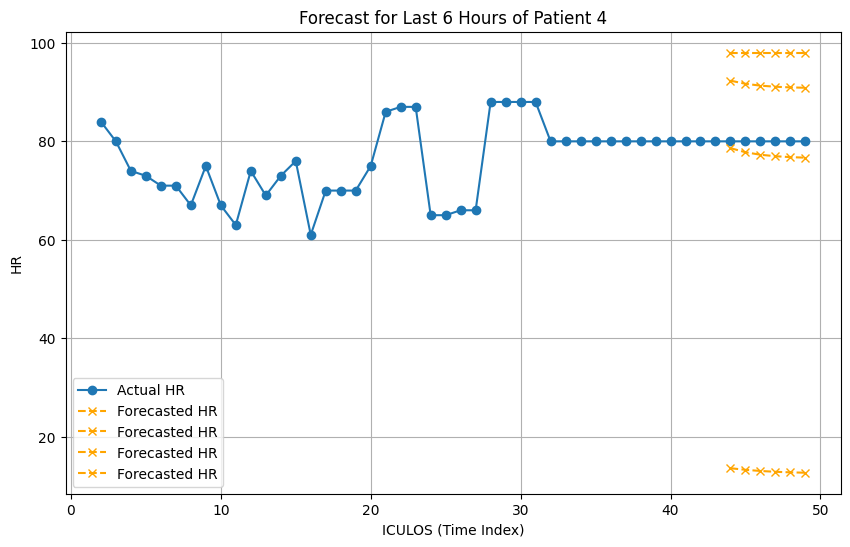

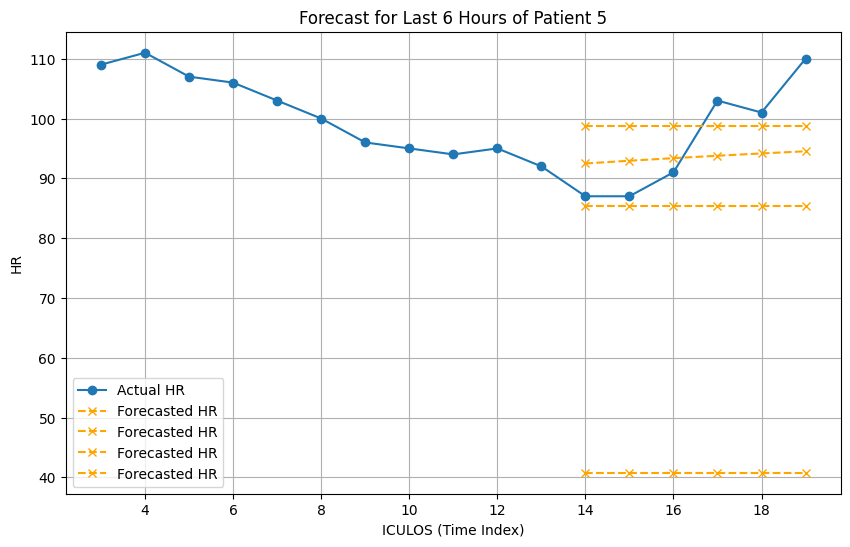

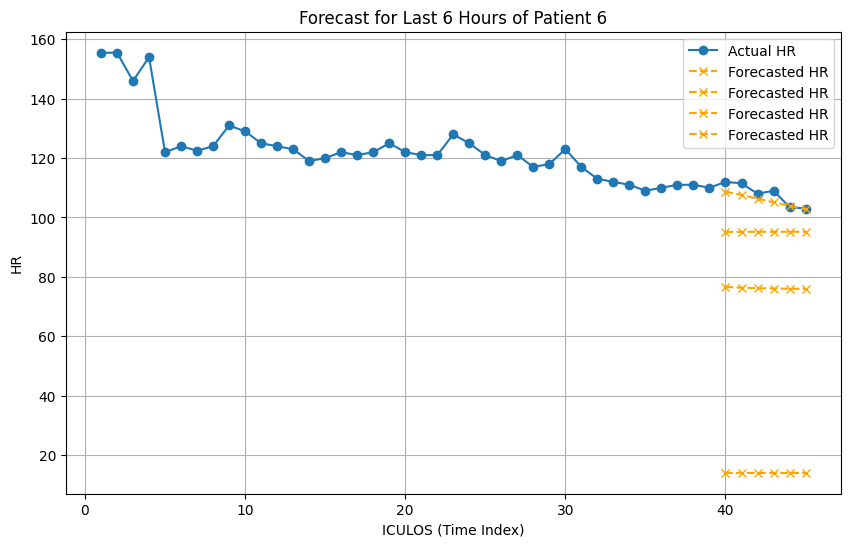

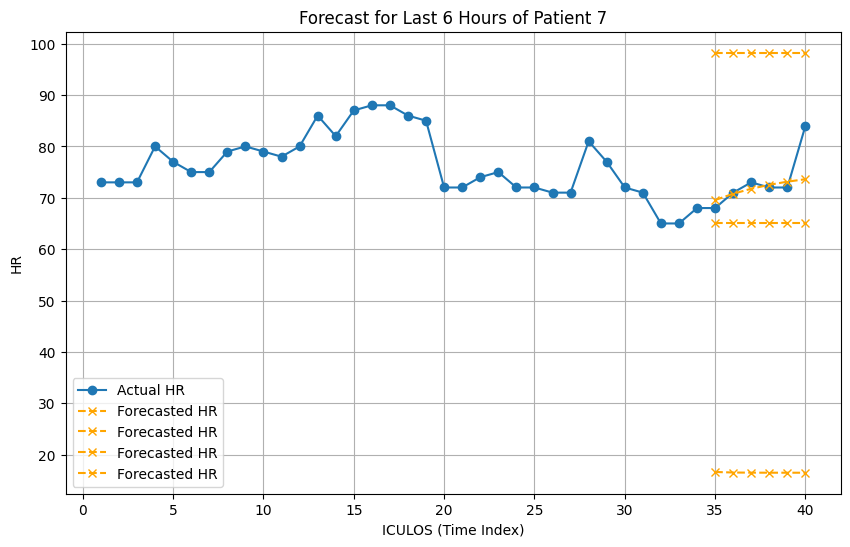

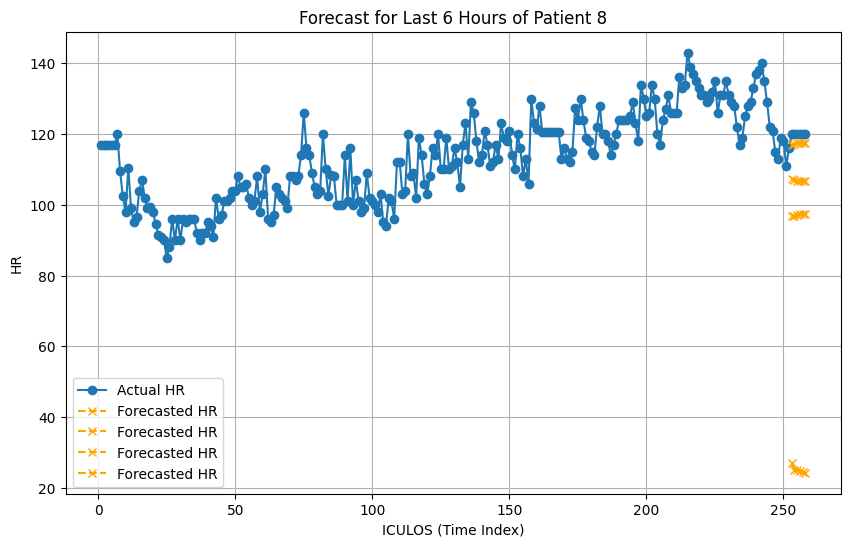

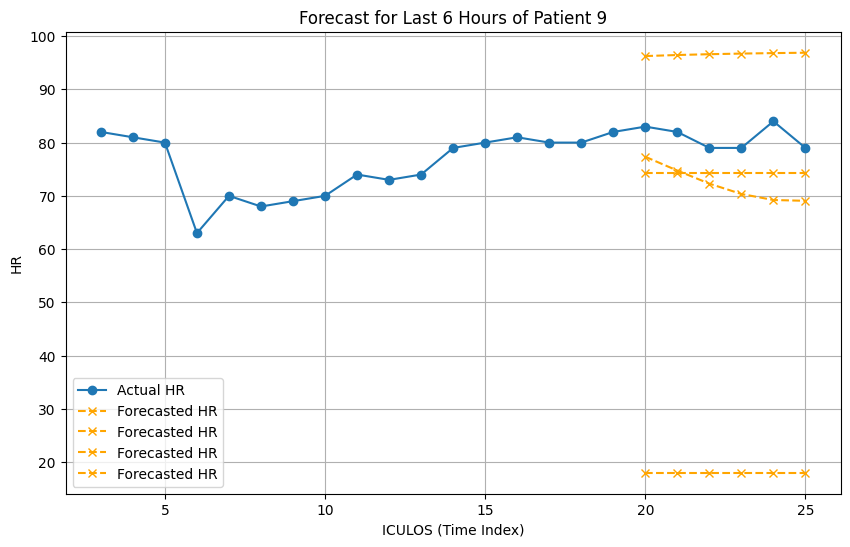

KeyError: 10

In [3]:
HRforecaster = ARIMAmodel.ARIMAForecaster('HR', train_data_sub, test_data_sub)
HRforecaster.fit()
forecasts = HRforecaster.predict(steps=6)
for patient_id in range(1, 20):
    HRforecaster.plot_forecast(forecasts, patient_id=patient_id, steps=6)

In [12]:
HRforecaster.evaluate_model(forecasts)

NameError: name 'HRforecaster' is not defined

In [7]:
VARforecaster = VARmodel.VARForecaster(train_data_sub, test_data_sub, ["HR", "O2Sat"])


In [8]:
VARforecaster.fit()
VARforecasts = VARforecaster.predict(steps=6)

Unique value counts per feature:
 HR       161
O2Sat     29
dtype: int64


ValueError: x contains one or more constant columns. Column(s) 1 are constant. Adding a constant with trend='c' is not allowed.

In [9]:
train_data_sub

HR  O2Sat  Resp    MAP
Patient_ID ICULOS                           
0          1        97.0   95.0  19.0  75.33
           2        97.0   95.0  19.0  75.33
           3        89.0   99.0  22.0  86.00
           4        90.0   95.0  30.0  86.00
           5       103.0   88.5  24.5  91.33
...                  ...    ...   ...    ...
99         29      115.0  100.0  20.0  84.67
           30      125.0   96.0  15.0  89.00
           31      107.5   95.5  18.0  78.83
           32      102.0   98.0  18.0  80.67
           33       97.0   97.0  23.0  72.67

[3076 rows x 4 columns]

In [ ]:
VARforecaster.evaluate_model(VARforecasts)

In [ ]:
VARforecaster.plot_forecast(VARforecasts)